In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize as opt
from scipy.optimize import Bounds
import urllib
from sqlalchemy import create_engine
import json
import csv

In [7]:
def draw_graph(graph):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)

    # show graph
    plt.show()

In [3]:
def func_graph(n, p):
    vector_c = []
    graph = nx.gnp_random_graph(n, p)
    A = nx.to_numpy_array(graph, dtype='int32')
    A = A+np.eye(n,dtype='int32')
    nx.draw(graph, pos=nx.spring_layout(graph), node_color='g', with_labels=True)
    plt.draw()
    plt.show()
    return A

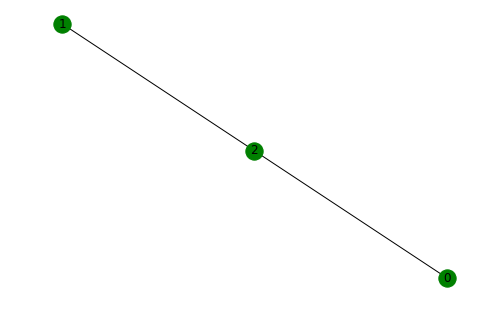

array([[1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

In [9]:
func_graph(3, 0.7)

MAX(SUM(b(ei+sum(ej))- cei))
i принадлежит коалиции S
j<>i принадлежит S (0,1,2)
b1= ln(x0+x1+x2+1)
x1=0 
b0=ln(x0+x1*0+x2*0+1)
b1=ln(x1+x0*0+x2*1+1)
b2=ln(x2+x0*0+x1*1+1)
max(b0+b1+b2-cx0-cx1-cx2)
xi>=0

In [5]:
def func2(comb,x):
    rez = 0
    for i, x_i in enumerate(comb):
        if x_i == 1:
            rez+=np.log(A[i].dot(comb.T*x.T)+1)-x_i*0.01*x[i]                           
    return -rez

In [20]:
def func2_var_c(comb,x,c):
    rez = 0
    for i, x_i in enumerate(comb):
        if x_i == 1:
            rez+=np.log(A[i].dot(comb.T*x.T)+1)-x_i*c*x[i]                           
    return -rez

In [4]:
def func_comb(n):
    list_combinations,tmp = [],[]
    for i in range(1, pow(2, n)):
        tmp.append(bin(i)[2:].zfill(n))
        list_combinations.append([int(i) for i in bin(i)[2:].zfill(n)])
    list_combinations=np.array(list_combinations)
    return list_combinations

In [7]:
func_comb(4)

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 0],
       [1, 1, 1, 1]])

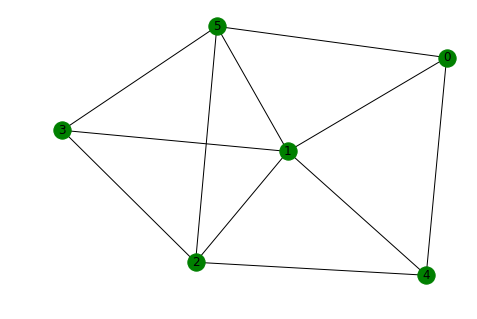

[[1 1 0 0 1 1]
 [1 1 1 1 1 1]
 [0 1 1 1 1 1]
 [0 1 1 1 0 1]
 [1 1 1 0 1 0]
 [1 1 1 1 0 1]] = A
[  0.         598.98044042   0.           0.           0.
   0.        ]


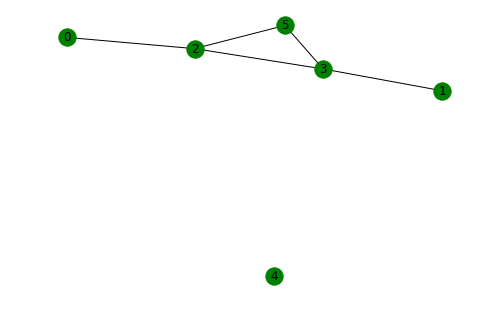

[[1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [1 0 1 1 0 1]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]
 [0 0 1 1 0 1]] = A
[  0.         139.83983545 249.57248869  80.05693643 106.41785049
   0.        ]


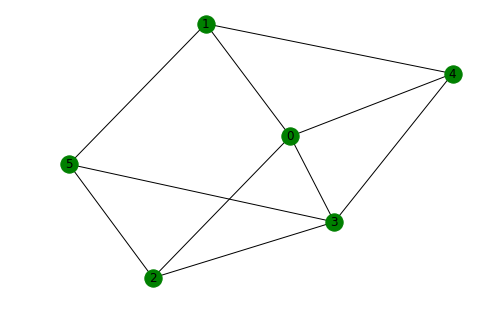

[[1 1 1 1 1 0]
 [1 1 0 0 1 1]
 [1 0 1 1 0 1]
 [1 0 1 1 1 1]
 [1 1 0 1 1 0]
 [0 1 1 1 0 1]] = A
[231.38643683  76.28897364   0.         302.7542322    0.
   0.        ]


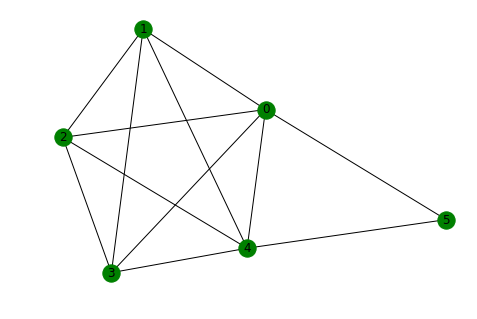

[[1 1 1 1 1 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]
 [1 0 0 0 1 1]] = A
[284.29130845   0.           0.           0.         314.6991449
   0.        ]


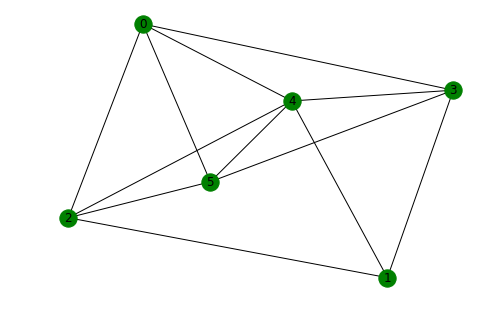

[[1 0 1 1 1 1]
 [0 1 1 1 1 0]
 [1 1 1 0 1 1]
 [1 1 0 1 1 1]
 [1 1 1 1 1 1]
 [1 0 1 1 1 1]] = A
[  0.           0.           0.           0.         609.85671901
   0.        ]


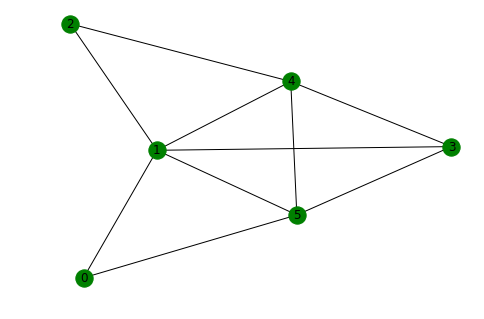

[[1 1 0 0 0 1]
 [1 1 1 1 1 1]
 [0 1 1 0 1 0]
 [0 1 0 1 1 1]
 [0 1 1 1 1 1]
 [1 1 0 1 1 1]] = A
[  0.         598.99819553   0.           0.           0.
   0.        ]


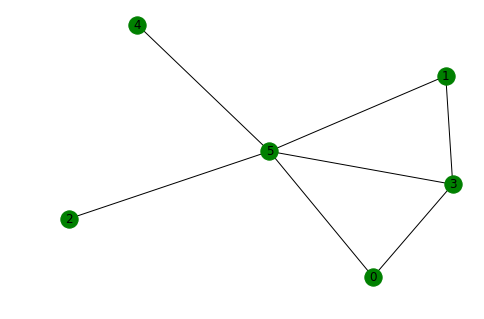

[[1 0 0 1 0 1]
 [0 1 0 1 0 1]
 [0 0 1 0 0 1]
 [1 1 0 1 0 1]
 [0 0 0 0 1 1]
 [1 1 1 1 1 1]] = A
[  0.           0.           0.           0.           0.
 598.94041755]


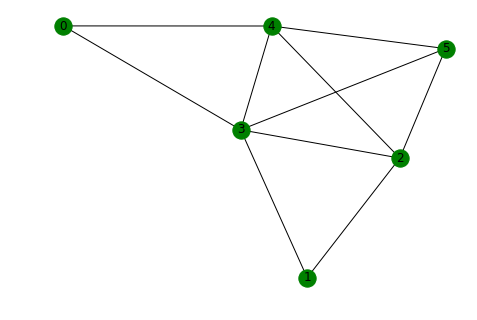

[[1 0 0 1 1 0]
 [0 1 1 1 0 0]
 [0 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 0 1 1 1 1]
 [0 0 1 1 1 1]] = A
[  0.           0.           0.         598.99974806   0.
   0.        ]


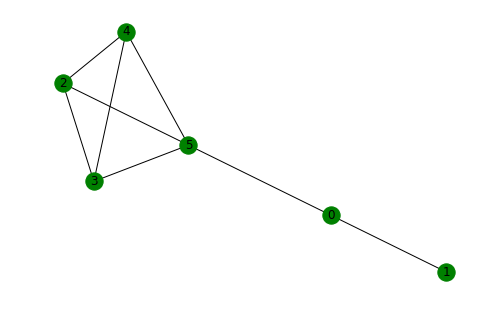

[[1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 1 1 1 1]
 [0 0 1 1 1 1]
 [0 0 1 1 1 1]
 [1 0 1 1 1 1]] = A
[149.07686752   0.           0.           0.           0.
 449.14393545]


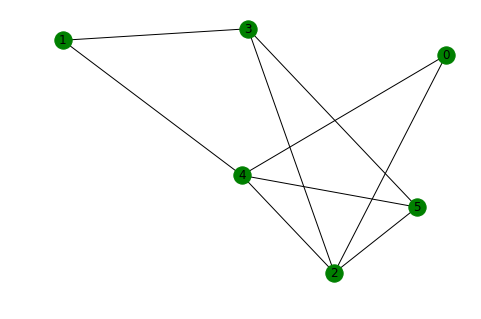

[[1 0 1 0 1 0]
 [0 1 0 1 1 0]
 [1 0 1 1 1 1]
 [0 1 1 1 0 1]
 [1 1 1 0 1 1]
 [0 0 1 1 1 1]] = A
[  0.           0.         299.3332583    0.         299.34207567
   0.        ]


[32.39157792810867,
 27.595026011452767,
 30.9649378656721,
 32.39157793053738,
 32.390607385297265,
 32.391577931269744,
 32.39157790171101,
 32.39157793129635,
 30.14890204681715,
 31.008615051555466]

In [44]:
n = 6
x0 = np.array(np.zeros(n,))
tmp = []
comb = np.array([1,1,1,1,1,1])
results,list_res = [], []
step = 0.001
quantity = 10
bounds = Bounds(np.zeros(n,),[np.inf for i in range(0,n)])
x_final,final = [], []

for k in range(0,quantity):    
    A = func_graph(n,0.6)
    print(A, '= A')
    res = opt.minimize(lambda x: func2(comb,x), x0, method='TNC', bounds = bounds)
    x_final.append(-func2(comb,res.x))
    print(res.x)
x_final

n - количество игроков
quantity - количество испытаний
c - значение издрежек
p- вероятность создания связи
final - массив с максимумами функции 

In [7]:
n = 2
x0 = np.array(np.zeros(n,))
tmp = []
list_combinations = func_comb(n)
results = []
list_res = []
step = 0.001
quantity = 10
bounds = Bounds(np.zeros(n,),[np.inf for i in range(0,n)])
final = []

x_final = []
t = 0
cols = []

for p in np.arange(0.5,1.0,step):
    cols += ['p_'+str(p)]
# print(cols)
dt_stat = pd.DataFrame(columns=cols)
# print(dt_stat)
tt = 0
for p in np.arange(0.5,1.0,step):
    
    for k in range(0,quantity):    
        A = func_graph(n,p)
        for comb in list_combinations:
            if t==1:
                res = opt.minimize(lambda x: func2(comb,x), x0, method='TNC', bounds = bounds)
                x_final.append(-func2(comb,res.x))
                break;
            t=t+1
        t = 0
    dt_stat[cols[tt]] = x_final
    x_final=[]
    tt+=1
    break
print(res)
    
    


    


     fun: -3.6151701849020244
     jac: array([-4.4408921e-07,  0.0000000e+00])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 6
  status: 0
 success: True
       x: array([98.99533946,  0.        ])


500 500


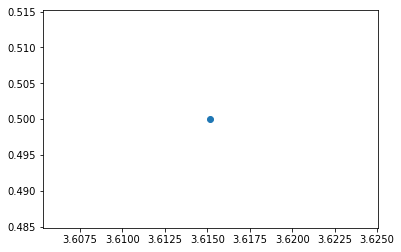

In [29]:
data = {}
results_hist = []
temp = dt_stat.mean()
print(len(temp),len(dt_stat.columns))
plt.scatter(temp,np.arange(0.5,1.0,step))
plt.show()


In [10]:
n = 3
x0 = np.array(np.zeros(n,))
tmp = []
list_combinations = func_comb(n)
results = []
list_res = []
step = 0.1
quantity = 1000
bounds = Bounds(np.zeros(n,),[np.inf for i in range(0,n)])
final = []
x_final = []
t = 0
cols = []

for с in np.arange(0.01,3,step):
    cols += ['c_'+str(с)]
dt_stat = pd.DataFrame(columns=cols)
tt = 0
for c in np.arange(0.01,3,step):    
    for k in range(0,quantity):    
        A = func_graph(n,0.6)
        for comb in list_combinations:
            if t==27:
                res = opt.minimize(lambda x: func2_c(comb,x,c), x0, method='TNC', bounds = bounds)
                x_final.append(-func2_c(comb,res.x,c))
                break
            t=t+1
        t = 0
    dt_stat[cols[tt]] = x_final
    x_final=[]
    tt+=1
dt_stat.head()

,c_0.01,c_0.11,c_0.21000000000000002,c_0.31000000000000005,c_0.41000000000000003,c_0.51,c_0.6100000000000001,c_0.7100000000000001,c_0.81,c_0.91,...,c_2.01,c_2.11,c_2.21,c_2.31,c_2.41,c_2.51,c_2.61,c_2.71,c_2.81,c_2.91


In [ ]:
data = {}
results_hist = []
temp = dt_stat.mean()
print(len(temp),len(dt_stat.columns))
plt.scatter(temp,np.arange(0.01,3,step))
plt.show()

In [22]:
master_data=pd.read_csv('C:\\Users\\Daria_Riazanova\\Documents\\NIR\\SelfEducation\\NIR10players.csv',header = 0)
print(master_data.head())
master_data.describe()


   MAX FUNCTION
0      3.968845
1      3.968845
2      9.316985
3      3.968845
4      9.316985


,MAX FUNCTION
count,204600.000000
mean,26.924107
std,9.972631
min,3.968845
25%,20.016762
50%,26.644298
75%,33.313982
max,62.651302


204600


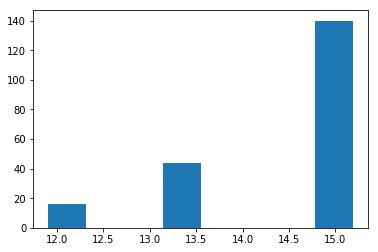

In [39]:
data = {}
results_hist = []
q = pow(2,10)-1
print(len(master_data))
for i in range(0,int(len(master_data)/(q))):
    results_hist.append(master_data.values[i*q+10])
y = np.array(results_hist)
# print(len(results_hist))
plt.hist(y, int(1+1.44*np.log(len(y))))
# print(y)
plt.show()

[[1 1 1 1 1]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [1 0 0 1 0]
 [1 0 0 0 1]] = A


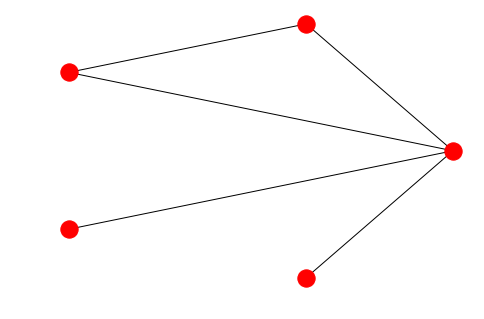

[0 0 0 0 1] 3.6151701849020244
[0 0 0 1 0] 3.6151701849020244
[0 0 0 1 1] 7.230340369351271
[0 0 1 0 0] 3.6151701849020244
[0 0 1 0 1] 7.230340369351271
[0 0 1 1 0] 7.230340369351271
[0 0 1 1 1] 10.845510557584532
[0 1 0 0 0] 3.6151701849020244
[0 1 0 0 1] 7.230340369351271
[0 1 0 1 0] 7.230340369351271
[0 1 0 1 1] 10.845510557584532
[0 1 1 0 0] 8.606634730512166
[0 1 1 0 1] 12.221804918048544
[0 1 1 1 0] 12.221804918048544
[0 1 1 1 1] 15.8369751035323
[1 0 0 0 0] 3.6151701849020244
[1 0 0 0 1] 8.606634730512166
[1 0 0 1 0] 8.606634730512166
[1 0 0 1 1] 14.121347421030581
[1 0 1 0 0] 8.606634730512166
[1 0 1 0 1] 14.121347421030581
[1 0 1 1 0] 14.121347421030581
[1 0 1 1 1] 19.97585818511978
[1 1 0 0 0] 8.606634730512166
[1 1 0 0 1] 14.121347421030581
[1 1 0 1 0] 14.121347421030581
[1 1 0 1 1] 19.97585818511978
[1 1 1 0 0] 14.121347423536783
[1 1 1 0 1] 19.975858188399748
[1 1 1 1 0] 19.97585818843143
[1 1 1 1 1] 26.083040488036048
{'V(5,)': 3.6151701849020244, 'V(4,)': 3.6151701849020

In [9]:
n = 5
x0 = np.array(np.zeros(n,))
tmp = []
v_dict = {}
# comb = np.array([1,1,1,1,1])
list_combinations = func_comb(n)
results,list_res = [], []
step = 0.001
quantity = 10
bounds = Bounds(np.zeros(n,),[np.inf for i in range(0,n)])
x_final,final = [], []
A = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 0, 0],[1, 1, 1, 0, 0],[1, 0, 0, 1, 0],[1, 0, 0, 0, 1]])
print(A, '= A')
graph = [(1, 2),(1, 3),(1, 4), (1, 5), (2,3)]
draw_graph(graph)
for comb in list_combinations:
    res = opt.minimize(lambda x: func2(comb,x), x0, method='TNC', bounds = bounds)
    x_final.append(-func2(comb,res.x))
    print(comb, -func2(comb,res.x))
    t = str(comb*[1,2,3,4,5]).replace('[', 'V(').replace('0','').replace(']', ')').replace('  ',' ').replace(' ', ',')
    t = t.replace(',,', ',').replace(',',', ' ).replace('V(, ','V(').replace(', )',')')
    if len(t) == 4:
        t = t.replace(')',',)')
    v_dict.update({t:-func2(comb,res.x)})
print(v_dict)
with open('file.txt', 'w') as file:
    json.dump(v_dict, file)
#      file.write(json.dumps(v_dict))    